# Portfolio Part 3 - Analysis of Mobile Price Data (2024 S1)

In this Portfolio task, you will work on a new dataset named 'Mobile Price Data', it contains numerous details about mobile phone hardware, specifications, and prices. Your main task is to train classification models to predict **mobile phone prices** ('price range' in the dataset)and evaluate the strengths and weaknesses of these models.

Here's the explanation of each column:

|Column|Meaning|
|:-----:|:-----:|
|battery power|Total energy a battery can store in one time measured in mAh|
|blue|Has bluetooth or not|
|clock speed|speed at which microprocessor executes instructions|
|dual sim|Has dual sim support or not|
|fc|Front Camera mega pixels|
|four g|Has 4G or not|
|int memory|Internal Memory in Gigabytes|
|m dep|Mobile Depth in cm|
|mobile wt|Weight of mobile phone|
|n cores|Number of cores of processor|
|pc|Primary Camera mega pixels|
|px height|Pixel Resolution Height|
|px width|Pixel Resolution Width|
|ram|Random Access Memory in Mega Bytes|
|sc h|Screen Height of mobile in cm|
|sc w|Screen Width of mobile in cm|
|talk time|longest time that a single battery charge will last when you are|
|three g|Has 3G or not|
|touch screen|Has touch screen or not|
|wifi|Has wifi or not|
|price range|This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)|

Blue, dual sim, four g, three g, touch screen, and wifi are all binary attributes, 0 for not and 1 for yes.

Your high level goal in this notebook is to build and evaluate predictive models for 'price range' from other available features. More specifically, you need to **complete the following major steps**:

1. ***Explore the data*** and ***clean the data if necessary***. For example, remove abnormal instanaces and replace missing values.

2. ***Study the correlation*** between 'price range' with other features. And ***select the variables*** that you think are helpful for predicting the price range. We do not limit the number of variables.

3. ***Split the dataset*** (Trainging set : Test set = 8 : 2)

4. ***Train a logistic regression model*** to predict 'price range' based on the selected features (from the second step). ***Calculate the accuracy*** of your model. (You are required to report the accuracy from both training set and test set.) ***Explain your model and evaluate its performance*** (Is the model performing well? If yes, what factors might be contributing to the good performance of your model? If not, how can improvements be made?).

5. ***Train a KNN model*** to predict 'price range' based on the selected features (you can use the features selected from the second step and set K with an ad-hoc manner in this step. ***Calculate the accuracy*** of your model. (You are required to report the accuracy from both training set and test set.)

6. ***Tune the hyper-parameter K*** in KNN (Hints: GridsearchCV), ***visualize the results***, and ***explain*** how K influences the prediction performance.

  Hints for visualization: You can use line chart to visualize K and mean accuracy scores on test set.

Note 1: In this assignment, we no longer provide specific guidance and templates for each sub task. You should learn how to properly comment your notebook by yourself to make your notebook file readable.

Note 2: You will not being evaluated on the accuracy of the model but on the process that you use to generate it and your explanation.

# Step 1 :- First we import Libraries,Explore the data and clean the data 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OrdinalEncoder  
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist 
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
%matplotlib inline

In [2]:
df_uncleaned = pd.read_csv('files/Mobile_Price_Data.csv', index_col=1)

In [3]:
df_uncleaned.head()

,battery_power,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
blue,,,,,,,,,,,,,,,,,,,,
0,842,2.2,0,1,0,7.0,0.6,188,2,2,20,756.0,2549.0,9,7,19,0.0,0,1,1
1,1021,0.5,1,0,1,53.0,0.7,136,3,6,905,1988.0,2631.0,17,3,7,1.0,1,0,2
1,563,0.5,1,2,1,41.0,0.9,145,5,6,1263,1716.0,2603.0,11,2,9,1.0,1,0,2
1,615,2.5,0,0,0,10.0,0.8,131,6,9,1216,1786.0,2769.0,16,8,11,1.0,0,0,2
1,1821,1.2,0,13,1,44.0,0.6,141,2,14,1208,1212.0,1411.0,8,2,15,1.0,1,0,1


In [4]:
df_uncleaned.describe()

,battery_power,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1999.000000,1999.000000,2000.000000,2000.000000,2000.000000,2000.000000,1999.000000,1999.000000,2000.000000,2000.000000,2000.000000,1999.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,0.509500,4.309500,0.521500,32.035018,0.501601,140.249000,4.520500,9.916500,645.108000,1251.566783,2124.218609,12.306500,5.767000,11.011000,0.761381,0.503000,0.507000,1.500000
std,439.418206,0.816004,0.500035,4.341444,0.499662,18.142986,0.288411,35.399655,2.287837,6.064315,443.780811,432.301505,1085.003435,4.213245,4.356398,5.463955,0.426346,0.500116,0.500076,1.118314
min,501.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.500000,1207.000000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2147.000000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3065.000000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## Explore the Dataset

In [5]:
df_uncleaned.head()

,battery_power,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
blue,,,,,,,,,,,,,,,,,,,,
0,842,2.2,0,1,0,7.0,0.6,188,2,2,20,756.0,2549.0,9,7,19,0.0,0,1,1
1,1021,0.5,1,0,1,53.0,0.7,136,3,6,905,1988.0,2631.0,17,3,7,1.0,1,0,2
1,563,0.5,1,2,1,41.0,0.9,145,5,6,1263,1716.0,2603.0,11,2,9,1.0,1,0,2
1,615,2.5,0,0,0,10.0,0.8,131,6,9,1216,1786.0,2769.0,16,8,11,1.0,0,0,2
1,1821,1.2,0,13,1,44.0,0.6,141,2,14,1208,1212.0,1411.0,8,2,15,1.0,1,0,1


In [6]:
df_uncleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 0 to 1
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   clock_speed    2000 non-null   float64
 2   dual_sim       2000 non-null   int64  
 3   fc             2000 non-null   int64  
 4   four_g         2000 non-null   int64  
 5   int_memory     1999 non-null   float64
 6   m_dep          1999 non-null   float64
 7   mobile_wt      2000 non-null   int64  
 8   n_cores        2000 non-null   int64  
 9   pc             2000 non-null   int64  
 10  px_height      2000 non-null   int64  
 11  px_width       1999 non-null   float64
 12  ram            1999 non-null   float64
 13  sc_h           2000 non-null   int64  
 14  sc_w           2000 non-null   int64  
 15  talk_time      2000 non-null   int64  
 16  three_g        1999 non-null   float64
 17  touch_screen   2000 non-null   int64  
 18  wifi           2

In [7]:
df_uncleaned.shape

(2000, 20)

In [8]:
df_uncleaned.index

Index([0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       ...
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1],
      dtype='int64', name='blue', length=2000)

In [9]:
columns_to_check = ['int_memory', 'm_dep', 'px_width', 'ram', 'talk_time', 'three_g']

# Remove rows with missing values in specified columns
df = df_uncleaned.dropna(subset=columns_to_check)

# Step 2 Correlation Matrix

In [10]:
df.corr()

,battery_power,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.012529,-0.041212,0.033517,0.014471,-0.002742,0.034308,0.000132,-0.028439,0.032506,0.015287,-0.008386,0.000896,-0.030540,-0.019287,0.052160,0.011357,-0.011873,-0.009772,0.202652
clock_speed,0.012529,1.000000,-0.000845,-0.000782,-0.044095,0.005452,-0.013468,0.012530,-0.005009,-0.006509,-0.014376,-0.008884,0.002935,-0.028743,-0.007245,-0.011464,-0.046555,0.021101,-0.025155,-0.006926
dual_sim,-0.041212,-0.000845,1.000000,-0.027615,0.004754,-0.015394,-0.023029,-0.008174,-0.025251,-0.016044,-0.021557,0.014326,0.041806,-0.013379,-0.018276,-0.038098,-0.014847,-0.016641,0.022342,0.018153
fc,0.033517,-0.000782,-0.027615,1.000000,-0.017437,-0.031110,-0.002332,0.024703,-0.013460,0.644175,-0.011687,-0.007198,0.013656,-0.011618,-0.013256,-0.005303,0.001315,-0.017277,0.021095,0.019327
four_g,0.014471,-0.044095,0.004754,-0.017437,1.000000,0.009334,-0.000228,-0.016336,-0.028589,-0.006755,-0.019414,0.007388,0.007262,0.027625,0.038203,-0.048541,0.585564,0.017320,-0.018109,0.014572
int_memory,-0.002742,0.005452,-0.015394,-0.031110,0.009334,1.000000,0.006351,-0.035124,-0.028041,-0.034702,0.010710,-0.007978,0.032178,0.037940,0.011764,-0.000660,-0.009921,-0.027310,0.006446,0.043861
m_dep,0.034308,-0.013468,-0.023029,-0.002332,-0.000228,0.006351,1.000000,0.021518,-0.004149,0.026838,0.025050,0.023203,-0.009317,-0.026057,-0.019070,0.018721,-0.012557,-0.003851,-0.028214,0.000776
mobile_wt,0.000132,0.012530,-0.008174,0.024703,-0.016336,-0.035124,0.021518,1.000000,-0.017837,0.020027,0.002895,0.001652,-0.001527,-0.033186,-0.018086,0.006721,0.001580,-0.014889,-0.002044,-0.028663
n_cores,-0.028439,-0.005009,-0.025251,-0.013460,-0.028589,-0.028041,-0.004149,-0.017837,1.000000,-0.001005,-0.007380,0.023775,0.004178,-0.000208,0.024386,0.013116,-0.014430,0.023494,-0.008334,0.003573
pc,0.032506,-0.006509,-0.016044,0.644175,-0.006755,-0.034702,0.026838,0.020027,-0.001005,1.000000,-0.019423,0.003389,0.027735,0.005013,-0.024549,0.015041,-0.001436,-0.008935,0.005880,0.031831


In [11]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,battery_power,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.012529,-0.041212,0.033517,0.014471,-0.002742,0.034308,0.000132,-0.028439,0.032506,0.015287,-0.008386,0.000896,-0.030540,-0.019287,0.052160,0.011357,-0.011873,-0.009772,0.202652
clock_speed,0.012529,1.000000,-0.000845,-0.000782,-0.044095,0.005452,-0.013468,0.012530,-0.005009,-0.006509,-0.014376,-0.008884,0.002935,-0.028743,-0.007245,-0.011464,-0.046555,0.021101,-0.025155,-0.006926
dual_sim,-0.041212,-0.000845,1.000000,-0.027615,0.004754,-0.015394,-0.023029,-0.008174,-0.025251,-0.016044,-0.021557,0.014326,0.041806,-0.013379,-0.018276,-0.038098,-0.014847,-0.016641,0.022342,0.018153
fc,0.033517,-0.000782,-0.027615,1.000000,-0.017437,-0.031110,-0.002332,0.024703,-0.013460,0.644175,-0.011687,-0.007198,0.013656,-0.011618,-0.013256,-0.005303,0.001315,-0.017277,0.021095,0.019327
four_g,0.014471,-0.044095,0.004754,-0.017437,1.000000,0.009334,-0.000228,-0.016336,-0.028589,-0.006755,-0.019414,0.007388,0.007262,0.027625,0.038203,-0.048541,0.585564,0.017320,-0.018109,0.014572
int_memory,-0.002742,0.005452,-0.015394,-0.031110,0.009334,1.000000,0.006351,-0.035124,-0.028041,-0.034702,0.010710,-0.007978,0.032178,0.037940,0.011764,-0.000660,-0.009921,-0.027310,0.006446,0.043861
m_dep,0.034308,-0.013468,-0.023029,-0.002332,-0.000228,0.006351,1.000000,0.021518,-0.004149,0.026838,0.025050,0.023203,-0.009317,-0.026057,-0.019070,0.018721,-0.012557,-0.003851,-0.028214,0.000776
mobile_wt,0.000132,0.012530,-0.008174,0.024703,-0.016336,-0.035124,0.021518,1.000000,-0.017837,0.020027,0.002895,0.001652,-0.001527,-0.033186,-0.018086,0.006721,0.001580,-0.014889,-0.002044,-0.028663
n_cores,-0.028439,-0.005009,-0.025251,-0.013460,-0.028589,-0.028041,-0.004149,-0.017837,1.000000,-0.001005,-0.007380,0.023775,0.004178,-0.000208,0.024386,0.013116,-0.014430,0.023494,-0.008334,0.003573
pc,0.032506,-0.006509,-0.016044,0.644175,-0.006755,-0.034702,0.026838,0.020027,-0.001005,1.000000,-0.019423,0.003389,0.027735,0.005013,-0.024549,0.015041,-0.001436,-0.008935,0.005880,0.031831


# Step 3 Split Training and Testing Data


In [12]:
# Create a new data frame called data only with our variables that we are going to train
data = df[['battery_power', 'ram', 'px_height', 'px_width', 'price_range']]

# Split the data into dependent variable (X) and target variable (y)
X = data.drop('price_range', axis=1)
y = data['price_range']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Step 4 Train Linear Regression Models 



In [13]:
train_case, test_case = train_test_split(df, test_size=0.2, random_state=142)
print("Train case shape 2",train_case.shape)
print("Test case shape 2",test_case.shape)

Train case shape 2 (1596, 20)
Test case shape 2 (399, 20)


In [14]:
reg = linear_model.LinearRegression()
X_case = train_case[['ram', 'px_height']]
y_case= train_case['price_range']  
reg.fit(X_case, y_case)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [0.00094876 0.00040841] + -0.7785625229317996


In [15]:
reg = linear_model.LinearRegression()
X_train = train_case[['ram', 'px_height']]
y_train = train_case['price_range']  

X_test = test_case[['ram', 'px_height']]
y_test = test_case['price_range'] 

In [16]:
reg.fit(X_case, y_case)

LinearRegression()

In [17]:
predicted = reg.predict(X_test)
mse = round(((np.array(y_test) - predicted)**2).sum()/len(y_test),4)
rmse =np.sqrt(mse)
r_squared = r2_score(y_test, predicted)

In [18]:
print("MSE",mse)
print("RMSE",rmse)
print("R Squared", r_squared)

MSE 0.1579
RMSE 0.3973663297261106
R Squared 0.8675474246503407


## Analysis

The MSE and RMSE score are relatively low and the R-squared value is relatively high suggesting that the model captures the linear regression model of the dependent and the independent variable and can make reasonable prediction of the data.

## Testing the accuracy of the Linear Regression model

In [19]:
# Initialize the logistic regression model
model = LogisticRegression(max_iter=10000) # We increase the max iter due to a warning message describing that there is the need of more iterations in the model

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the training and test data
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculate the accuracy on both training and test sets
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy on training set:", train_accuracy)
print("Accuracy on test set:", test_accuracy)

# Report for the test set
print("Classification report for test set:")
print(classification_report(y_test, test_predictions))

Accuracy on training set: 0.7951127819548872
Accuracy on test set: 0.7944862155388471
Classification report for test set:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        92
           1       0.80      0.74      0.77       109
           2       0.65      0.71      0.68       102
           3       0.82      0.82      0.82        96

    accuracy                           0.79       399
   macro avg       0.80      0.80      0.80       399
weighted avg       0.80      0.79      0.80       399



## Analysis

The model has an accuracy score of 79% on both training and test data which suggests a good fit and the model effectively captures the relationship between the variables. The metrics score like precision, f1 score and recall should ideally be close to one which is the case for the model. Overall the model suggests a good result.

# Step 5 :-Training in KNN model


In [27]:
km = KMeans(n_clusters=2)
km.fit(df)

C:\Users\suyas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\suyas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


KMeans(n_clusters=2)

In [28]:
df['label'] = km.predict(df)

C:\Users\suyas\AppData\Local\Temp\ipykernel_8360\20707512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = km.predict(df)


In [31]:
df_mean = df.groupby(['label']).agg('mean')
df_mean

,battery_power,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
label,,,,,,,,,,,,,,,,,,,,
0,1241.775844,1.520778,0.496418,4.230297,0.517912,31.551689,0.508188,140.397134,4.491300,9.718526,665.368475,1259.160696,1167.498465,12.214944,5.570113,11.040942,0.753327,0.517912,0.494371,0.571136
1,1235.098232,1.523477,0.520629,4.378193,0.525540,32.487230,0.495088,140.110020,4.551081,10.104126,624.882122,1243.981336,3043.772102,12.379175,5.949902,11.009823,0.768173,0.488212,0.517682,2.391945


### Hierarchical Clustering

Since we don't know how many clusters there should be in the data, a better approach is to use Hierarchical clustering and examine the dendograph to understand what natural clusters are present in the data.  

 

In [32]:
dist = pdist(df, 'euclidean')
linkage_matrix = linkage(dist,method='complete')

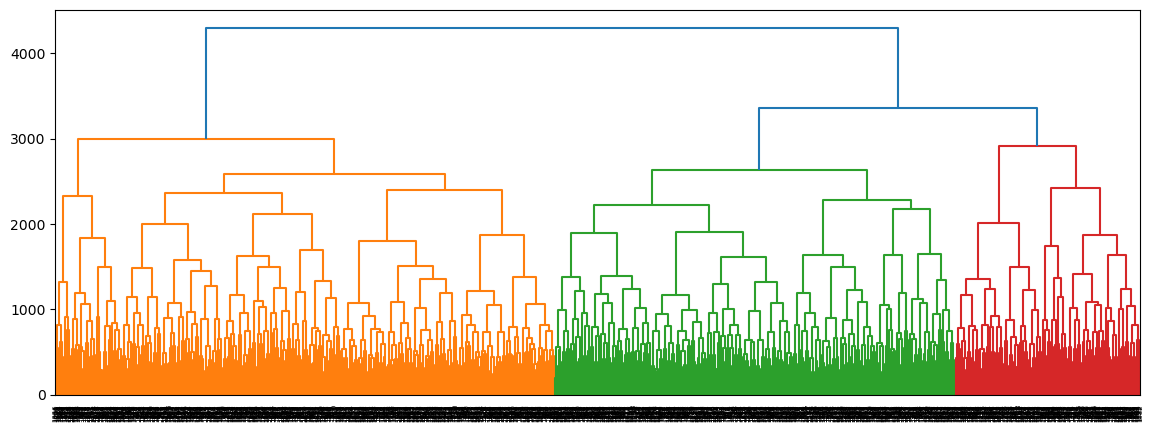

In [33]:
plt.figure(figsize=(14,5))
dendrogram(linkage_matrix)
plt.show()

### Train the KNN Model


In [35]:
# initialize the KNN model 
knn_model = KNeighborsClassifier(n_neighbors=2)

# fit the model on the training data
knn_model.fit(X_train, y_train)

# make predictions on the training and test data
train_predictions = knn_model.predict(X_train)
test_predictions = knn_model.predict(X_test)

# calculate the accuracy on both training and test sets
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Accuracy on training set:", train_accuracy)
print("Accuracy on test set:", test_accuracy)

Accuracy on training set: 0.843358395989975
Accuracy on test set: 0.7368421052631579


### Analysis of the result

Here we got accuracy score of 84% and 73% on the training and test set which is good result.

# Step 6 : - Tune the hyper-parameter K

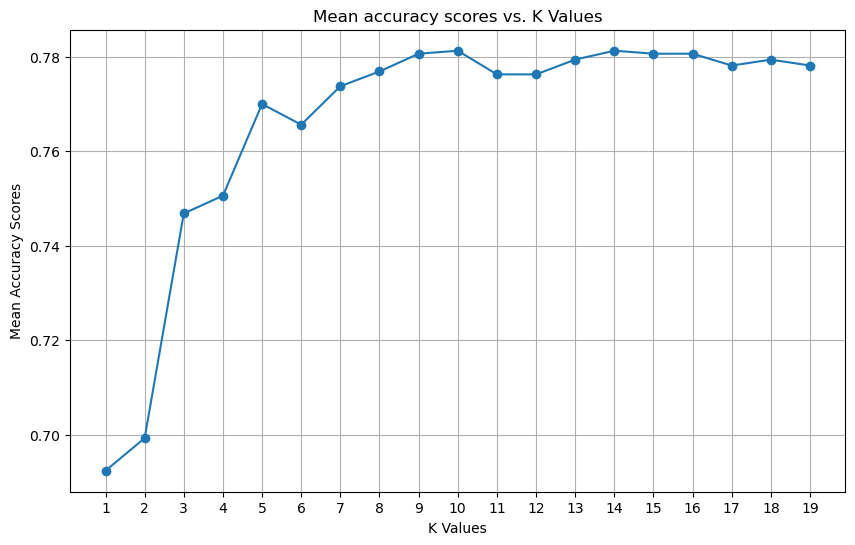

Best k value: 14


In [36]:
# define the range of k values to search over
k_values = np.arange(1, 20)  

# define the parameter grid for GridSearchCV
param_grid = {'n_neighbors': k_values}

# perform grid search using GridSearchCV
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# mean cross-validated accuracy scores for each k value
mean_scores = grid_search.cv_results_['mean_test_score']

# visualization
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_scores, marker='o', linestyle='-')
plt.title('Mean accuracy scores vs. K Values')
plt.xlabel('K Values')
plt.ylabel('Mean Accuracy Scores')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# best k value
best_k = grid_search.best_params_['n_neighbors']
print("Best k value:", best_k)

### Analysis of the result

The best K value for the model is 14 . The X axis represents the number of neighbors(k) considered as classifier whereas the Y-axis represents the mean accuracy score. The graph highlights the mean accurancy score increases as the number of neighbor increases. A small value of k means that the classifier only considers the labels of the few nearest neighbor, this can cause the model to fail to capture the underlying pattern in the data . Whereas, the large value k represents the classifier considers too many neighbors which can lead to overfitting.

The optimal value of k depends upon the data set and for this one the value is 12.We have applied logistic regression model and KNN model with 2 neighbors where the values have performed well.